# EDA of RNA-Seq data:

## Setup Jargon


In [1]:
# Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##1 Load data & Nomalization

In [2]:
! ls "/content/"

CelegansRawCounts.csv  Labels.csv  sample_data


In [3]:
# Load data into Pandas dataframe:
counts_df = pd.read_csv("/content/CelegansRawCounts.csv",header=None)
counts_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6644,6645,6646,6647,6648,6649,6650,6651,6652,6653,6654,6655,6656,6657,6658,6659,6660,6661,6662,6663,6664,6665,6666,6667,6668,6669,6670,6671,6672,6673,6674,6675,6676,6677,6678,6679,6680,6681,6682,6683
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2045,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2046,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2047,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
labels_df = pd.read_csv('/content/Labels.csv', header=None, names=['label1', 'label2'])
labels_df

,label1,label2
0,Body_wall_muscle,BWM_anterior
1,Body_wall_muscle,BWM_anterior
2,Body_wall_muscle,BWM_anterior
3,Body_wall_muscle,BWM_anterior
4,Body_wall_muscle,BWM_anterior
...,...,...
2044,Body_wall_muscle_early,BWM_posterior_early
2045,Body_wall_muscle_early,BWM_posterior_early
2046,Body_wall_muscle_early,BWM_posterior_early
2047,Body_wall_muscle_early,BWM_posterior_early


In [5]:
# normalize data:
log_counts = np.log10(counts_df+1)
# add 2 label columns to the data:
df = pd.concat((log_counts, labels_df), axis=1)
df.head(n=10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6646,6647,6648,6649,6650,6651,6652,6653,6654,6655,6656,6657,6658,6659,6660,6661,6662,6663,6664,6665,6666,6667,6668,6669,6670,6671,6672,6673,6674,6675,6676,6677,6678,6679,6680,6681,6682,6683,label1,label2
0,0.0,0.0,0.0,0.0,0.30103,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.30103,0.0,0.00000,0.0,0.0,0.0,0.0,0.477121,0.0,0.30103,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.30103,0.0,0.00000,0.0,0.30103,0.0,0.0,0.301030,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Body_wall_muscle,BWM_anterior
1,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.477121,0.0,0.00000,0.0,0.0,0.0,0.301030,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.30103,0.0,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Body_wall_muscle,BWM_anterior
2,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.698970,0.0,0.00000,0.0,0.0,0.0,0.477121,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.30103,0.0,0.00000,0.0,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Body_wall_muscle,BWM_anterior
3,0.0,0.0,0.0,0.0,0.30103,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.301030,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.000000,0.30103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Body_wall_muscle,BWM_anterior
4,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.30103,0.0,0.0,0.0,0.0,0.301030,0.0,0.30103,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.30103,0.0,0.00000,0.0,0.00000,0.0,0.0,0.301030,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.30103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Body_wall_muscle,BWM_anterior
5,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.602060,0.0,0.00000,0.0,0.0,0.0,0.301030,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Body_wall_muscle,BWM_anterior
6,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.30103,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.477121,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.30103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.30103,0.0,0.00000,0.0,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Body_wall_muscle,BWM_anterior
7,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.477121,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Body_wall_muscle,BWM_anterior
8,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.477121,0.30103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Body_wall_muscle,BWM_anterior
9,0.0,0.0,0.0,0.0,

###1.1 Know more about the data

In [6]:
# broad cell types:
print(len(np.unique(labels_df['label1'].values)))
np.unique(labels_df['label1'].values)

6


array(['Body_wall_muscle', 'Body_wall_muscle_early', 'Ciliated_neuron',
       'Hypodermis', 'Intestine', 'Non_ciliated_neuron'], dtype=object)

In this single cell data, there are 6 broad cell types.

In [7]:
# sub cell types:
print(len(np.unique(labels_df['label2'].values)))
np.unique(labels_df['label2'].values)

25


array(['ADF', 'ADL', 'AFD', 'AIB', 'AIY', 'ALA', 'ALM_PLM', 'ASE', 'ASH',
       'AVA', 'AVK', 'BWM_anterior', 'BWM_anterior_early',
       'BWM_far_posterior', 'BWM_far_posterior_early', 'BWM_head',
       'BWM_head_early', 'BWM_middle', 'BWM_middle_early',
       'BWM_posterior', 'BWM_posterior_early', 'Hypodermis',
       'Intestine_anterior', 'Intestine_far_posterior',
       'Intestine_middle_and_posterior'], dtype=object)

And 25 sub cell types

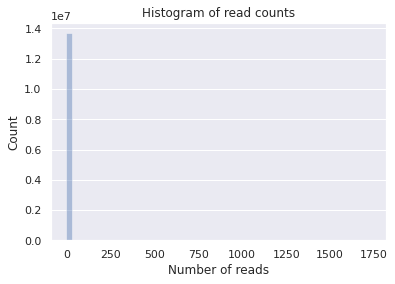

In [8]:
# show the distribution of raw counts:
all_reads = counts_df.values.flatten()
sns.set()
sns.distplot(all_reads, kde=False)
ax = plt.gca()
ax.xaxis.grid(False)
plt.title('Histogram of read counts')
plt.xlabel('Number of reads')
plt.ylabel('Count')
plt.show()

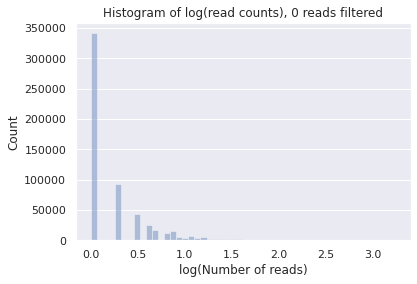

In [9]:
sns.distplot(np.log10(all_reads[all_reads > 0]), kde=False)
ax = plt.gca()
ax.xaxis.grid(False)
plt.title('Histogram of log(read counts), 0 reads filtered')
plt.xlabel('log(Number of reads)')
plt.ylabel('Count')
plt.show()

#2 Unsupervised learning methods

##2.1 Heatmap of correlation matrix

###2.1.1 Broad cell type

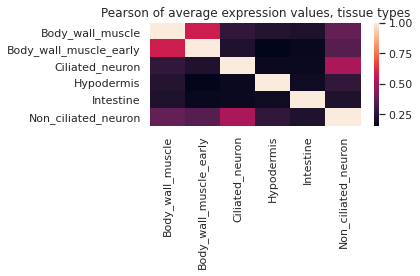

In [10]:
# take mean log(expression value+1) for each gene within each group
# using label 1 here (broad cell type groups)
avg_groups_df = df.groupby(['label1']).mean()

# plot the correlation matrix
group_cols = avg_groups_df.transpose()
pcorrs = group_cols.corr(method='pearson')
sns.heatmap(pcorrs)
sns.set(rc={'figure.figsize': (7, 6)})
plt.xlabel('')
plt.ylabel('')
plt.title('Pearson of average expression values, tissue types')
plt.tight_layout()
plt.savefig('corr_large.png')

###2.1.2 Sub cell types

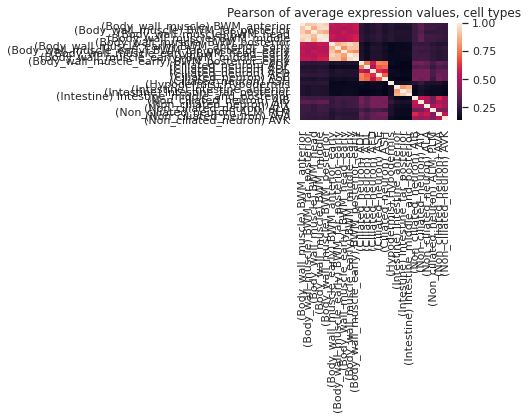

In [11]:
# take mean log(expression value+1) for each gene within each group
# use label 2 here (more specific groups)
df['label2_group'] = df[['label1', 'label2']].apply(lambda x: '({}) {}'.format(*x), axis=1)
avg_groups_df = df.groupby(['label2_group']).mean()

# then plot the correlation matrix
group_cols = avg_groups_df.transpose()
pcorrs = group_cols.corr(method='pearson')
sns.heatmap(pcorrs)
sns.set(rc={'figure.figsize': (100, 100)})
plt.xlabel('')
plt.ylabel('')
plt.title('Pearson of average expression values, cell types')
plt.tight_layout()
plt.savefig('corr_small.png')

##2.2 PCA

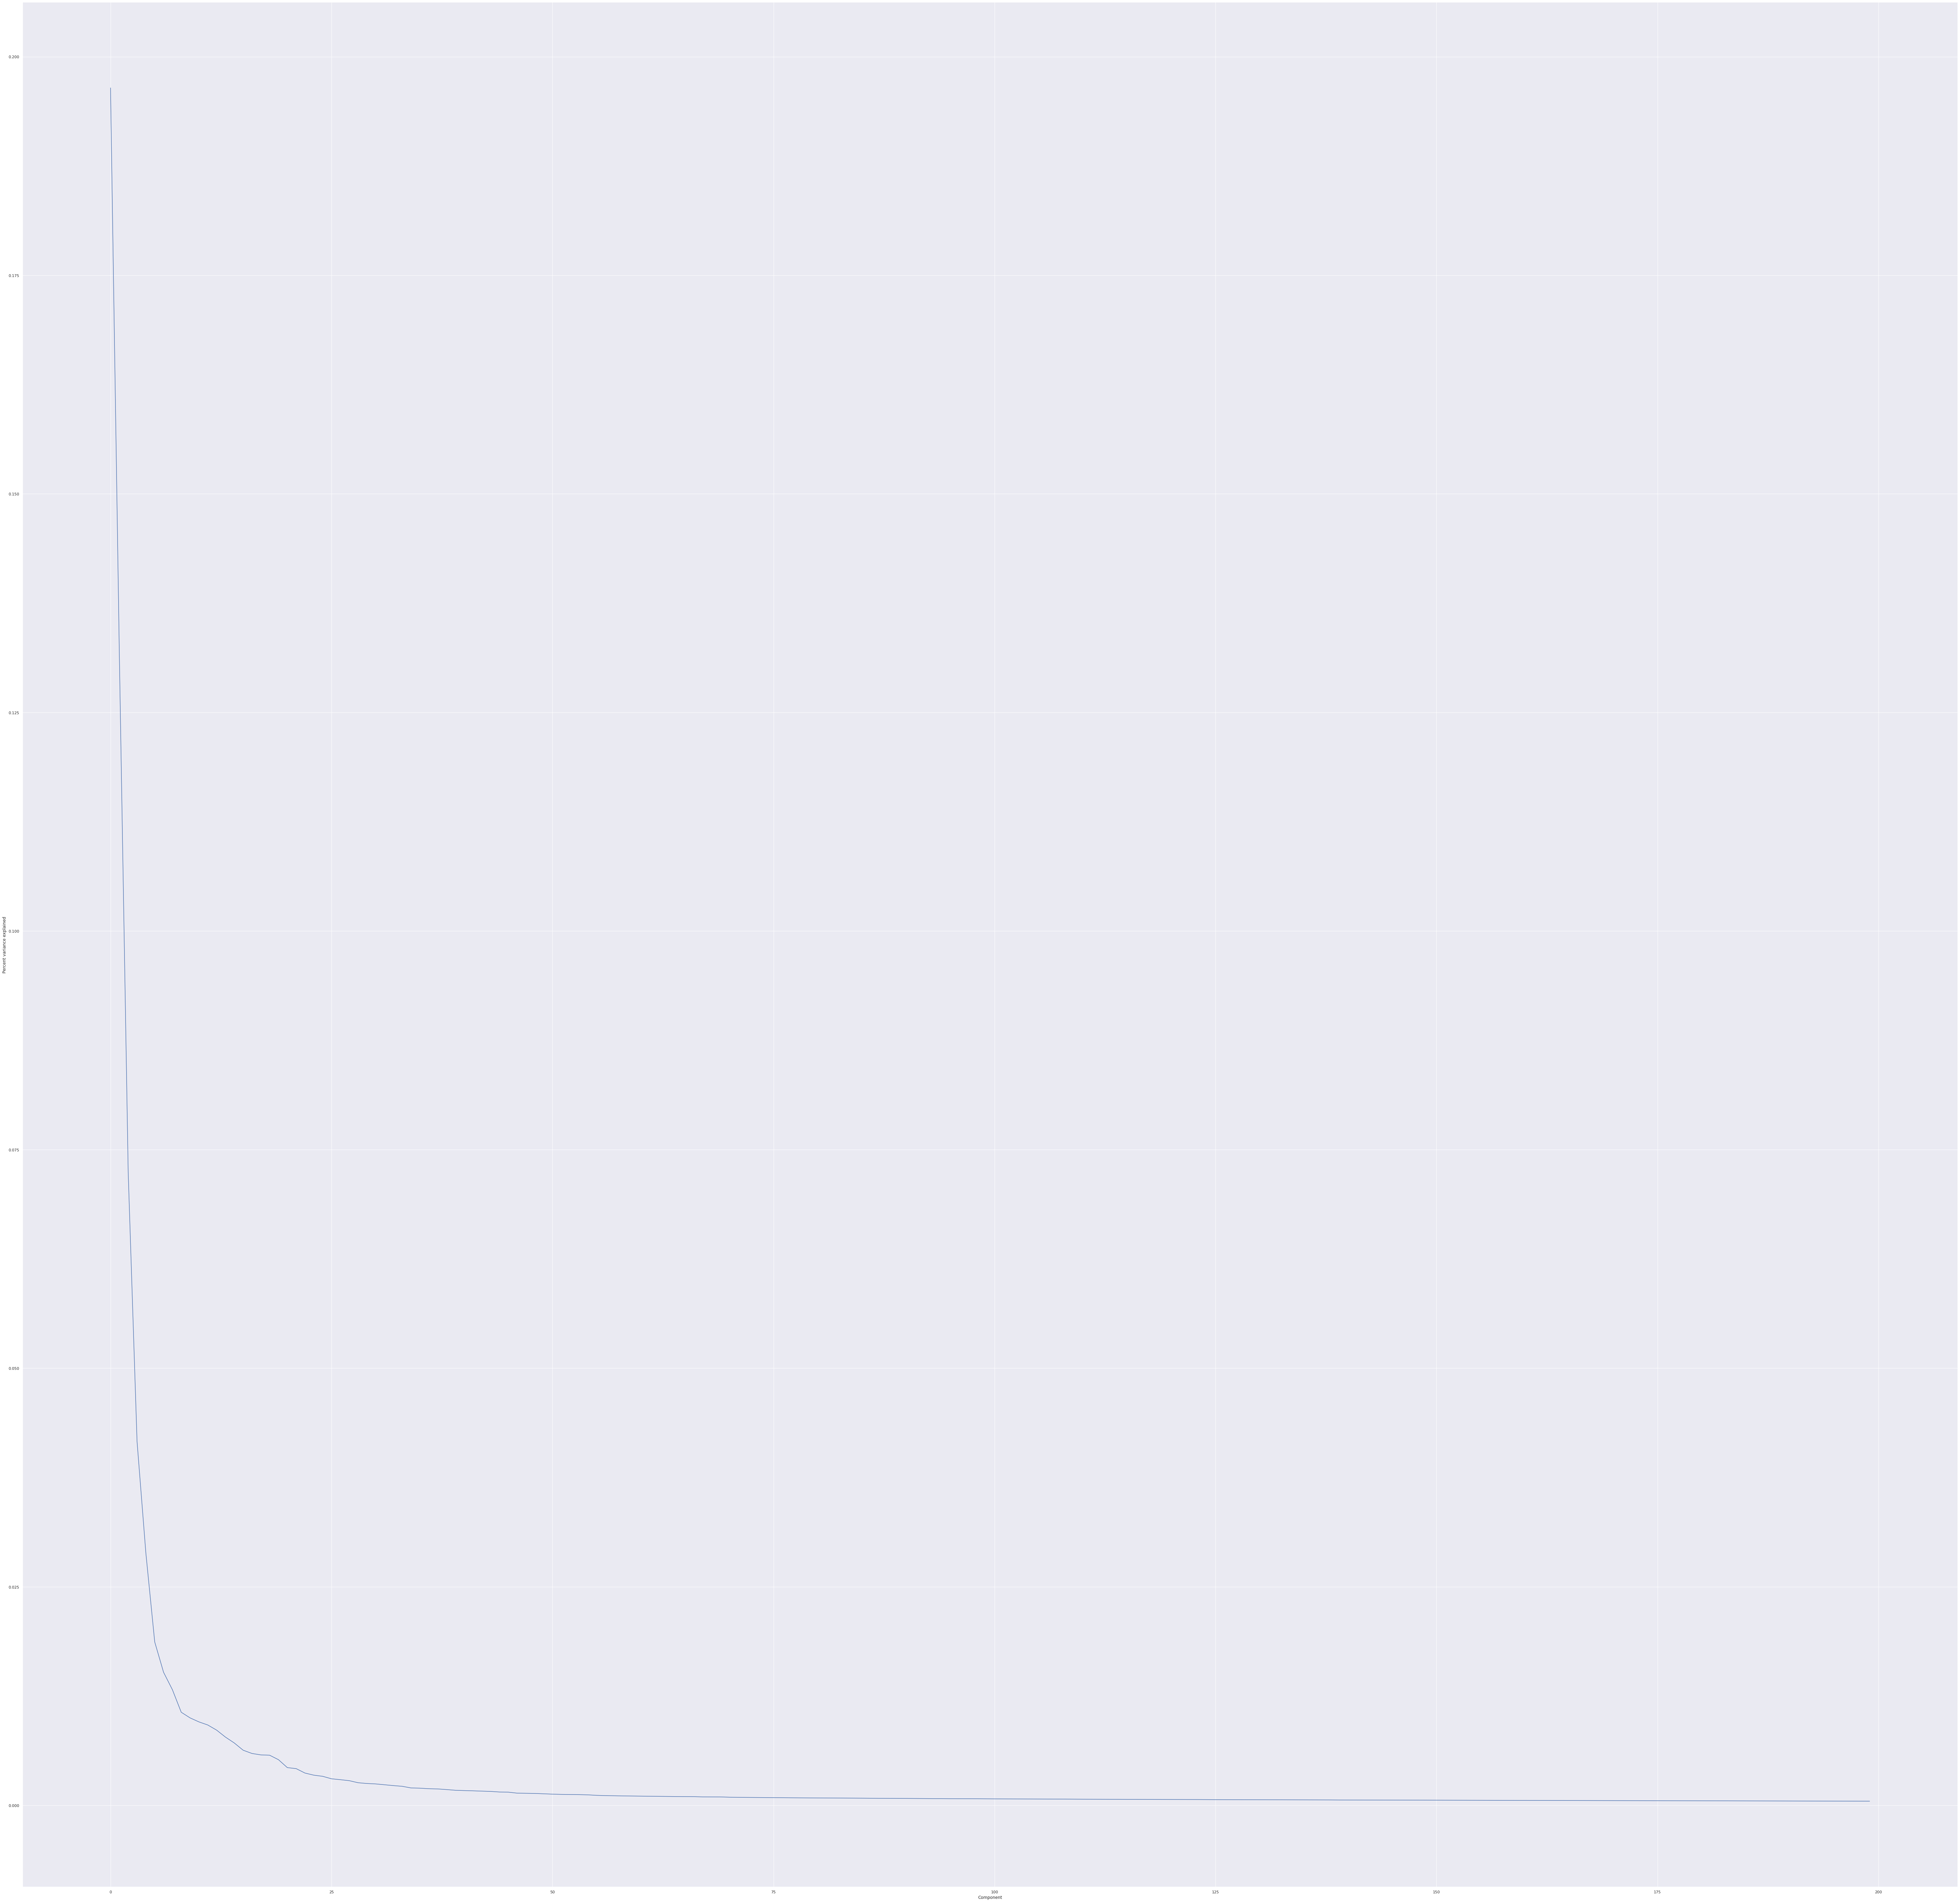

In [12]:
# fit PCA on gene expression matrix
import sklearn.decomposition as sd
X = log_counts.values
pca = sd.PCA(n_components=200)
X_proj = pca.fit_transform(X)
sns.lineplot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
sns.set(rc={'figure.figsize': (9, 6)})
plt.xlabel('Component')
plt.ylabel('Percent variance explained')
plt.show()

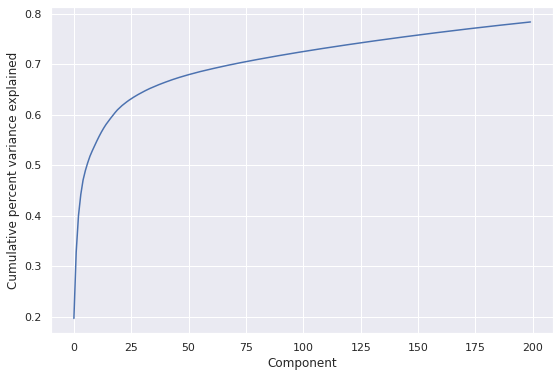

In [13]:
pc_vs_variance = np.cumsum(pca.explained_variance_ratio_)

pc_vs_variance
sns.lineplot(range(len(pca.explained_variance_ratio_)), pc_vs_variance)
sns.set(rc={'figure.figsize': (9, 6)})
#plt.plot(pc_vs_variance)
plt.xlabel('Component')
plt.ylabel('Cumulative percent variance explained')
plt.show()

In [14]:
pc_vs_variance

array([0.19643572, 0.32795191, 0.40031711, 0.44194898, 0.47077969,
       0.48946448, 0.50468164, 0.51790629, 0.52855107, 0.53855157,
       0.54809456, 0.55728411, 0.56588651, 0.5736901 , 0.58082205,
       0.58712713, 0.59305862, 0.59882727, 0.60455902, 0.60977856,
       0.61409287, 0.61829037, 0.6219808 , 0.62542956, 0.62874694,
       0.6317825 , 0.63471482, 0.63753579, 0.64012136, 0.64261803,
       0.64506552, 0.64741804, 0.64967444, 0.65184894, 0.65383711,
       0.65579946, 0.65769955, 0.65957431, 0.66137788, 0.66310056,
       0.66478805, 0.66644724, 0.66807338, 0.669663  , 0.67118756,
       0.67269246, 0.67408562, 0.67546061, 0.67681943, 0.67813821,
       0.67941688, 0.68066715, 0.68190404, 0.68312777, 0.68432552,
       0.68546776, 0.68657649, 0.68767202, 0.68874669, 0.68980928,
       0.69086417, 0.69190164, 0.6929322 , 0.69394295, 0.69494708,
       0.69594582, 0.69693659, 0.69790137, 0.69886104, 0.69981935,
       0.7007491 , 0.70166232, 0.70256773, 0.70346892, 0.70436

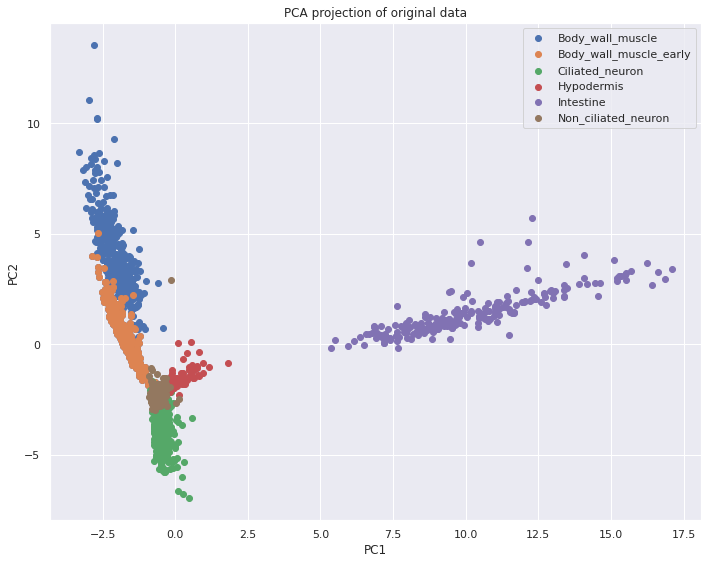

In [15]:
pca = sd.PCA(n_components=2)
X_proj = pca.fit_transform(X)
colors = ['red', 'orange', 'green', 'blue', 'yellow', 'purple']
sns.set(rc={'figure.figsize': (10, 8)})
for label, color in zip(np.unique(labels_df['label1'].values), colors):
    ixs = labels_df.index[labels_df['label1'].str.match(label)].tolist()
    plt.scatter(X_proj[ixs, 0], X_proj[ixs, 1], label=label)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA projection of original data')
plt.legend()
plt.tight_layout()
plt.savefig('pca.png')

#3 Supervised Learning methods

##3.1 Logistic Regression

Try different learning rate of 0.00001, 0.0001, 0.001, 0.005, 0.01, with different batch size: 1, 32 and full size.

In [0]:
#import tensorflow as tf 
import autograd.numpy as np
#import autograd.numpy
#import numpy as np
from autograd import grad 
import math
from random import shuffle
import matplotlib.pyplot as plt

def sigmoid(x):
    sigm = 1. / (1. + np.exp(-x))
    return sigm

class Adam: 
  
  
  def __init__(self,iterations,rate,beta1=0.9,beta2=0.999,epsilon=1e-8):
      self.iterations = iterations
      self.rate = rate
      self.beta1=beta1
      self.beta2=beta2
      self.epsilon=epsilon
      self.plot=50


  def LossFunction(self,w,x_train,y_train):
      a=np.dot(x_train,w) #w column vector
      a=sigmoid(a)
      term1=y_train*np.log(a)
      term2=(1-y_train)*(np.log(1-a))
      loss=-np.sum(term1)-np.sum(term2)
      
      return loss
      
      

  def AdamOptimizer (self,x_train,y_train): 
      d=x_train.shape[1]
      m=np.zeros(d);
      v=np.zeros(d);
      w=np.zeros(d)-1 #w column vector
      
      loss_w = grad(self.LossFunction,0) # derivative with respect to w
      
      
      self.loss_full=[]
      for i in range(1, self.iterations+1):
         if (i-1) % self.plot==0:
            self.loss_full.append(self.LossFunction(w,x_train,y_train))
         g_w=loss_w(w,x_train,y_train)
         m,v=self.Update_mv(g_w,m,v)
         m_hat,v_hat=self.Correct_mv(i,m,v)
         w=w-self.rate*m_hat/(np.sqrt(v_hat)+self.epsilon)
         
      w_MLE=w
      loss=self.LossFunction(w_MLE,x_train,y_train)
      return w_MLE,loss
  
    
  def AdamOptimizer_32 (self,x_train,y_train,size=200): #size is changable
      sample,d=x_train.shape
      
      m=np.zeros(d) #initialize m as 0
      v=np.zeros(d) #initialize v as 0
      w=np.zeros(d) #initialize w as 0
      
      batch=np.linspace(0,sample-1,sample)
      batch=batch.astype(int)
      num=math.floor(sample/size)
      epoch=math.ceil(self.iterations/num)
      
      loss_w = grad(self.LossFunction,0) # derivative with respect to w
      
      window=np.linspace(0,size-1,size) #get batch index
      window=window.astype(int)
     
      self.loss_minibatch=[]
      for i in range(0, epoch):
        shuffle(batch)
        for j in range (0,num):
             index=window+j*size
             ind=batch[index] #index used to update
             x_input=x_train[ind]
             y_input=y_train[ind]
             g_w=loss_w(w,x_input,y_input) #calculate gradient with respect to w 
             m,v=self.Update_mv(g_w,m,v)
             m_hat,v_hat=self.Correct_mv(i*num+j+1,m,v)
             w=w-self.rate*m_hat/(np.sqrt(v_hat)+self.epsilon)
             if (i*num+j) % self.plot==0: #for loss fuunction plot usage
                 self.loss_minibatch.append(self.LossFunction(w,x_input,y_input))
      w_MLE=w
      loss=self.LossFunction(w_MLE,x_train,y_train)
      return w_MLE,loss
    
  def Update_mv (self,g,m,v): 
      
      
      m=self.beta1*m+(1-self.beta1)*g
      v=self.beta2*v+(1-self.beta2)*np.power(g,2)
      
         
      return m,v
    
  def Correct_mv (self,n,m,v): 
      
      m_den=1-np.power(self.beta1,n) #m term denominator
      v_den=1-np.power(self.beta2,n) #v term denominator
      m_hat=m/m_den;
      v_hat=v/v_den;
         
      return m_hat,v_hat
  
  def Loss_plot(self):
      x=np.linspace(0,self.iterations,math.floor(self.iterations/self.plot)-1)
      l=x.size
      y_mini=np.array(self.loss_minibatch)[0:l]
      
          
      plt.figure(1, figsize=(8,6))
      plt.title('Loss Function Value')
      #plt.plot(x, y_mini, linewidth=3.0, label = 'mini-batch size of 32')
      plt.plot(x, y_mini, linewidth=3.0, label = 'full size')
      plt.legend()
      plt.xlabel('$x$')
      plt.ylabel('$y$')
      return

In [21]:
df_1=df[df['label1']=='Body_wall_muscle_early'].drop('label2',axis=1)
df_2=df[labels_df['label1']=='Body_wall_muscle'].drop('label2',axis=1)
df_use=pd.concat((df_1,df_2),axis=0)
df_use

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6646,6647,6648,6649,6650,6651,6652,6653,6654,6655,6656,6657,6658,6659,6660,6661,6662,6663,6664,6665,6666,6667,6668,6669,6670,6671,6672,6673,6674,6675,6676,6677,6678,6679,6680,6681,6682,6683,label1,label2_group
1549,0.0,0.0,0.0,0.0,0.30103,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.30103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Body_wall_muscle_early,(Body_wall_muscle_early) BWM_anterior_early
1550,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Body_wall_muscle_early,(Body_wall_muscle_early) BWM_anterior_early
1551,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.30103,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Body_wall_muscle_early,(Body_wall_muscle_early) BWM_anterior_early
1552,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Body_wall_muscle_early,(Body_wall_muscle_early) BWM_anterior_early
1553,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Body_wall_muscle_early,(Body_wall_muscle_early) BWM_anterior_early
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.30103,0.0,0.30103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.301030,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.30103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Body_wall_muscle,(Body_wall_muscle) BWM_posterior
496,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Body_wall_muscle,(Body_wall_muscle) BWM_posterior
497,0.0,0.0,0.0,0.0,0.00000,0.30103,0.0,0.0,0.30103,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [22]:
import numpy as np
data=np.array(df_use)
data.shape

(1000, 6686)

In [0]:
    offset=(np.zeros(1000)+1.0).T #model as w*x+b, so add a column as 1 in x
    X=np.c_[data[0:1000,0:6684],offset]
    X= X.astype(np.float)
    Y=data[0:1000,6684] # "Body_wall_muscle_early" ; "Body_wall_muscle"
    Y = np.array([0 if i=='Body_wall_muscle_early' else 1 for i in Y]) #Body_wall_muscle: 1; Body_wall_muscle_early: 0

In [0]:
# Randomly split the data:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=2020)

In [0]:
from sklearn.metrics import confusion_matrix

def sigmoid(x):
    sigm = 1. / (1. + np.exp(-x))
    return sigm

[ 0.06472125 -0.00889685  0.         ...  0.         -0.11734134
 -0.13986067]
3.3263150871930787
1.0
[[102   0]
 [  0  98]]


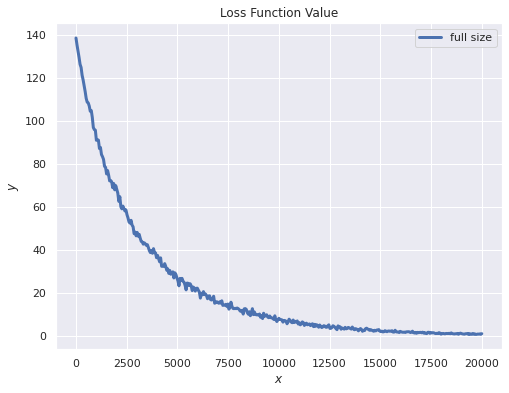

In [50]:
    iterations = 20000
    rate=0.00001
    
    adam=Adam(iterations,rate) #create adam optimizer class
   
    #mini batch with size 32 adam Optimizer 
    w_MLE,loss=adam.AdamOptimizer_32(x_train,y_train)
    print(w_MLE)
    print(loss)
    #prediction
    sample=x_test.shape[0]
    y_predict=[]
    for i in range(0, sample):
        p=np.dot(x_test[i,:],w_MLE)
        p=sigmoid(p)
        if p>0.5:
            y_predict.append(int(1))
        else:
            y_predict.append(int(0))
       
    y_predict=np.array(y_predict).T
    
    #calculate accuracy
    error=np.sum(np.abs(y_test-y_predict))
    accuracy=1-error/sample
    print(accuracy)
    
    print(confusion_matrix(y_test, y_predict))
    
    adam.Loss_plot()

Logistic regression using L1 norm and cross validation:

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def stratified_cv_all(X, y, c, seed=1):
    from sklearn.model_selection import StratifiedKFold
    from sklearn.linear_model import LogisticRegression

    skf = StratifiedKFold(n_splits=3, random_state=seed)
    accs = []
    coef_zeros = []
    for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        print('Running fold: {}'.format(fold))
        lr = LogisticRegression(C=c, penalty='l1', solver='saga')
        lr.fit(X[train_index], y[train_index])
        acc = lr.score(X[test_index], y[test_index])
        print('Accuracy for fold {}: {}'.format(fold, acc))
        accs.append(acc)
        zeros = np.count_nonzero(lr.coef_ == 0, axis=1)
        print('Zero coefficients for fold {}: {}'.format(fold, zeros))
        coef_zeros += list(zeros)
    return accs, coef_zeros

def confusion_matrix(X, y, c, seed=1):
    from sklearn.model_selection import StratifiedKFold
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import confusion_matrix

    skf = StratifiedKFold(n_splits=3, random_state=seed)
    accs = []
    coef_zeros = []
    cm = None
    for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        lr = LogisticRegression(C=c, penalty='l1',solver='saga')
        lr.fit(X[train_index], y[train_index])
        y_pred = lr.predict(X[test_index])
        cm_fold = confusion_matrix(y[test_index], y_pred)
        if cm is None:
            cm = cm_fold
        else:
            # use element-wise sum over all 3 folds
            cm = np.add(cm, cm_fold)
    return cm

def plot_confusion_matrix(cm, classes, output_file,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    import itertools

    # https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig(output_file)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.8477306002928258
Zero coefficients for fold 1: [6681 6683 6683 6684 6682 6682]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.8506588579795022
Zero coefficients for fold 2: [6681 6682 6683 6684 6682 6682]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.8140556368960469
Zero coefficients for fold 3: [6682 6682 6682 6684 6683 6683]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.1903367496339678
Zero coefficients for fold 1: [6684 6683 6684 6684 6684 6684 6683 6684 6684 6684 6683 6684 6684 6683
 6684 6684 6684 6684 6684 6683 6684 6684 6684 6684 6684]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.16544655929721816
Zero coefficients for fold 2: [6684 6684 6684 6684 6684 6684 6683 6684 6684 6684 6683 6684 6684 6683
 6684 6684 6684 6684 6684 6683 6684 6684 6684 6684 6684]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.19472913616398244
Zero coefficients for fold 3: [6684 6683 6684 6684 6684 6684 6683 6684 6684 6684 6683 6684 6684 6683
 6684 6684 6684 6684 6684 6683 6684 6684 6684 6684 6684]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9970059880239521
Zero coefficients for fold 1: [6681]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.8228228228228228
Zero coefficients for fold 2: [6680]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6681]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.8755490483162518
Zero coefficients for fold 1: [6681 6682 6681 6683 6680 6682]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.862371888726208
Zero coefficients for fold 2: [6681 6682 6683 6683 6682 6681]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.9780380673499268
Zero coefficients for fold 3: [6681 6681 6680 6683 6682 6681]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.616398243045388
Zero coefficients for fold 1: [6684 6683 6683 6684 6683 6684 6682 6683 6683 6684 6683 6683 6682 6683
 6682 6682 6682 6682 6683 6683 6682 6683 6682 6680 6681]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.6661786237188873
Zero coefficients for fold 2: [6684 6681 6683 6684 6683 6684 6683 6682 6683 6684 6683 6683 6682 6683
 6682 6682 6682 6682 6683 6683 6682 6683 6682 6681 6683]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.6383601756954612
Zero coefficients for fold 3: [6684 6683 6682 6684 6683 6684 6683 6682 6683 6684 6683 6683 6684 6683
 6682 6682 6682 6682 6683 6683 6682 6683 6682 6681 6682]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9970059880239521
Zero coefficients for fold 1: [6681]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9279279279279279
Zero coefficients for fold 2: [6679]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6680]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.8843338213762811
Zero coefficients for fold 1: [6679 6680 6677 6682 6677 6681]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.8814055636896047
Zero coefficients for fold 2: [6678 6680 6681 6682 6679 6677]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.9956076134699854
Zero coefficients for fold 3: [6677 6680 6677 6681 6681 6678]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.8301610541727672
Zero coefficients for fold 1: [6681 6680 6682 6684 6683 6682 6682 6678 6683 6684 6683 6679 6680 6682
 6681 6678 6678 6681 6679 6682 6681 6682 6679 6678 6677]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.8594436310395315
Zero coefficients for fold 2: [6680 6678 6682 6684 6683 6682 6683 6679 6683 6684 6683 6679 6679 6682
 6679 6680 6677 6681 6679 6682 6681 6682 6677 6678 6676]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.821376281112738
Zero coefficients for fold 3: [6683 6681 6681 6684 6683 6681 6683 6679 6683 6684 6683 6679 6679 6682
 6679 6680 6678 6681 6679 6682 6680 6680 6678 6678 6675]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9970059880239521
Zero coefficients for fold 1: [6676]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.978978978978979
Zero coefficients for fold 2: [6679]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6676]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.8887262079062958
Zero coefficients for fold 1: [6675 6675 6675 6681 6673 6681]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9048316251830161
Zero coefficients for fold 2: [6675 6679 6677 6679 6674 6676]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.9970717423133236
Zero coefficients for fold 3: [6674 6676 6676 6676 6673 6676]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9121522693997072
Zero coefficients for fold 1: [6680 6674 6681 6682 6683 6680 6682 6672 6682 6680 6682 6676 6672 6680
 6678 6674 6676 6673 6678 6678 6678 6680 6677 6676 6672]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9092240117130308
Zero coefficients for fold 2: [6680 6674 6681 6683 6683 6679 6681 6676 6681 6681 6683 6675 6674 6680
 6679 6677 6676 6677 6676 6681 6678 6679 6676 6675 6673]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.890190336749634
Zero coefficients for fold 3: [6680 6675 6679 6680 6683 6680 6681 6677 6680 6678 6683 6678 6672 6680
 6679 6678 6676 6674 6677 6679 6677 6676 6677 6676 6670]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9970059880239521
Zero coefficients for fold 1: [6670]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9819819819819819
Zero coefficients for fold 2: [6678]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6671]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9150805270863837
Zero coefficients for fold 1: [6667 6670 6667 6677 6667 6676]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9136163982430454
Zero coefficients for fold 2: [6672 6672 6670 6677 6665 6671]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.9985358711566618
Zero coefficients for fold 3: [6667 6670 6665 6671 6666 6671]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9385065885797951
Zero coefficients for fold 1: [6678 6672 6677 6675 6678 6677 6681 6671 6680 6676 6682 6668 6663 6671
 6674 6667 6671 6660 6669 6674 6670 6677 6674 6669 6667]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9385065885797951
Zero coefficients for fold 2: [6675 6670 6675 6675 6681 6677 6678 6669 6677 6676 6681 6666 6661 6669
 6670 6668 6672 6663 6669 6671 6673 6677 6673 6667 6668]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.91800878477306
Zero coefficients for fold 3: [6678 6673 6677 6673 6680 6679 6678 6670 6676 6675 6680 6667 6662 6673
 6673 6667 6670 6660 6668 6672 6671 6669 6672 6670 6665]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9970059880239521
Zero coefficients for fold 1: [6664]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.987987987987988
Zero coefficients for fold 2: [6673]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6662]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9458272327964861
Zero coefficients for fold 1: [6659 6666 6661 6675 6665 6670]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9121522693997072
Zero coefficients for fold 2: [6667 6666 6663 6672 6658 6664]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.9970717423133236
Zero coefficients for fold 3: [6661 6664 6658 6666 6658 6664]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9443631039531479
Zero coefficients for fold 1: [6674 6669 6675 6673 6678 6676 6679 6666 6675 6672 6682 6661 6660 6660
 6671 6655 6669 6651 6658 6669 6666 6675 6668 6663 6665]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9472913616398243
Zero coefficients for fold 2: [6672 6667 6675 6670 6677 6677 6678 6668 6677 6670 6679 6660 6657 6659
 6664 6655 6668 6646 6659 6665 6665 6670 6670 6664 6665]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.9297218155197657
Zero coefficients for fold 3: [6670 6669 6673 6669 6677 6675 6678 6665 6676 6670 6679 6656 6655 6660
 6668 6659 6669 6648 6660 6667 6668 6666 6668 6663 6661]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9970059880239521
Zero coefficients for fold 1: [6653]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.993993993993994
Zero coefficients for fold 2: [6666]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6653]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.972181551976574
Zero coefficients for fold 1: [6652 6655 6645 6668 6653 6656]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.91800878477306
Zero coefficients for fold 2: [6656 6659 6652 6664 6639 6647]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.9985358711566618
Zero coefficients for fold 3: [6651 6659 6639 6663 6645 6647]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9472913616398243
Zero coefficients for fold 1: [6665 6664 6661 6668 6672 6669 6676 6654 6674 6665 6679 6644 6644 6644
 6656 6646 6665 6631 6636 6639 6650 6666 6658 6657 6650]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9502196193265008
Zero coefficients for fold 2: [6664 6663 6664 6665 6669 6669 6675 6659 6673 6664 6676 6637 6641 6640
 6653 6645 6662 6624 6637 6646 6650 6662 6656 6655 6647]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.9385065885797951
Zero coefficients for fold 3: [6668 6663 6665 6666 6669 6666 6675 6656 6674 6667 6676 6636 6639 6642
 6653 6647 6665 6624 6645 6640 6649 6661 6657 6653 6640]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 1.0
Zero coefficients for fold 1: [6639]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.993993993993994
Zero coefficients for fold 2: [6653]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6643]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9853587115666179
Zero coefficients for fold 1: [6638 6639 6619 6657 6639 6640]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9282576866764275
Zero coefficients for fold 2: [6639 6649 6638 6650 6621 6628]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6630 6643 6617 6657 6619 6625]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9560761346998536
Zero coefficients for fold 1: [6650 6652 6648 6654 6661 6656 6672 6641 6661 6659 6670 6612 6620 6612
 6646 6624 6652 6585 6610 6617 6627 6654 6639 6645 6632]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9546120058565154
Zero coefficients for fold 2: [6646 6648 6653 6658 6659 6656 6669 6640 6664 6655 6670 6613 6616 6613
 6639 6624 6651 6585 6605 6609 6619 6649 6640 6632 6625]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.9443631039531479
Zero coefficients for fold 3: [6649 6649 6657 6659 6659 6661 6665 6639 6656 6660 6670 6606 6621 6612
 6639 6631 6652 6587 6613 6611 6619 6659 6645 6644 6622]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 1.0
Zero coefficients for fold 1: [6627]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.993993993993994
Zero coefficients for fold 2: [6645]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6627]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9897510980966325
Zero coefficients for fold 1: [6626 6630 6606 6650 6622 6630]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.931185944363104
Zero coefficients for fold 2: [6626 6643 6623 6642 6607 6615]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6624 6635 6609 6653 6608 6609]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9560761346998536
Zero coefficients for fold 1: [6639 6644 6641 6647 6651 6648 6666 6637 6654 6655 6671 6593 6604 6594
 6639 6608 6646 6551 6595 6592 6609 6646 6632 6636 6620]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9516837481698389
Zero coefficients for fold 2: [6634 6634 6647 6650 6644 6647 6660 6630 6656 6650 6667 6594 6602 6593
 6630 6616 6641 6554 6584 6581 6603 6634 6629 6623 6612]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.9428989751098097
Zero coefficients for fold 3: [6634 6635 6653 6656 6647 6655 6655 6624 6651 6658 6667 6588 6600 6597
 6630 6616 6640 6546 6597 6592 6594 6651 6635 6631 6613]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 1.0
Zero coefficients for fold 1: [6612]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.996996996996997
Zero coefficients for fold 2: [6639]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6619]


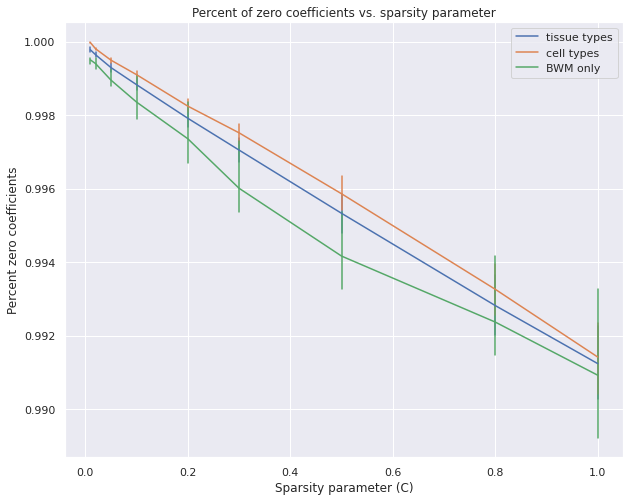

In [17]:
# All Body_wall_muscle:
    X, y = log_counts.values, labels_df.values
    total_genes = X.shape[1]
    bwm_ix = labels_df['label1'].isin(['Body_wall_muscle', 'Body_wall_muscle_early'])
    X_bwm, y_bwm = log_counts[bwm_ix].values, labels_df[bwm_ix].values
    C = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 0.8, 1]
    results = pd.DataFrame()
    zeros = pd.DataFrame()
    for c in C:
        c_acc_large, coef_large = stratified_cv_all(X, y[:, 0], c)
        c_acc_small, coef_small = stratified_cv_all(X, y[:, 1], c)
        c_acc_bwm, coef_bwm = stratified_cv_all(X_bwm, y_bwm[:, 0], c)
        c_data, z_data = [], []

        for lacc in c_acc_large:
            c_data.append([c, lacc, 'large'])
        for sacc in c_acc_small:
            c_data.append([c, sacc, 'small'])
        for bacc in c_acc_bwm:
            c_data.append([c, bacc, 'bwm_only'])
        c_df = pd.DataFrame(c_data, columns=['c', 'acc', 'labels'])
        results = pd.concat((results, c_df))

        for z_large in coef_large:
            z_data.append([c, z_large / total_genes, 'large'])
        for z_small in coef_small:
            z_data.append([c, z_small / total_genes, 'small'])
        for z_bwm in coef_bwm:
            z_data.append([c, z_bwm / total_genes, 'bwm_only'])
        c_zeros = pd.DataFrame(z_data, columns=['c', 'num_zeros', 'labels'])
        zeros = pd.concat((zeros, c_zeros))

    # plot accuracy vs. sparsity parameter for large/small labels
    sns.set()
    sns.lineplot(x='c', y='acc', hue='labels', data=results, err_style='bars')
    plt.title('Accuracy vs. sparsity parameter')
    plt.xlabel('Sparsity parameter (C)')
    plt.ylabel('Accuracy')
    plt.savefig('acc_vs_c.png')
    plt.gcf().clear()
    sns.lineplot(x='c', y='num_zeros', hue='labels', data=zeros, err_style='bars')
    plt.title('Percent of zero coefficients vs. sparsity parameter')
    plt.xlabel('Sparsity parameter (C)')
    plt.ylabel('Percent zero coefficients')
    plt.legend(['tissue types', 'cell types', 'BWM only'])
    plt.savefig('zeros_vs_c.png')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Se

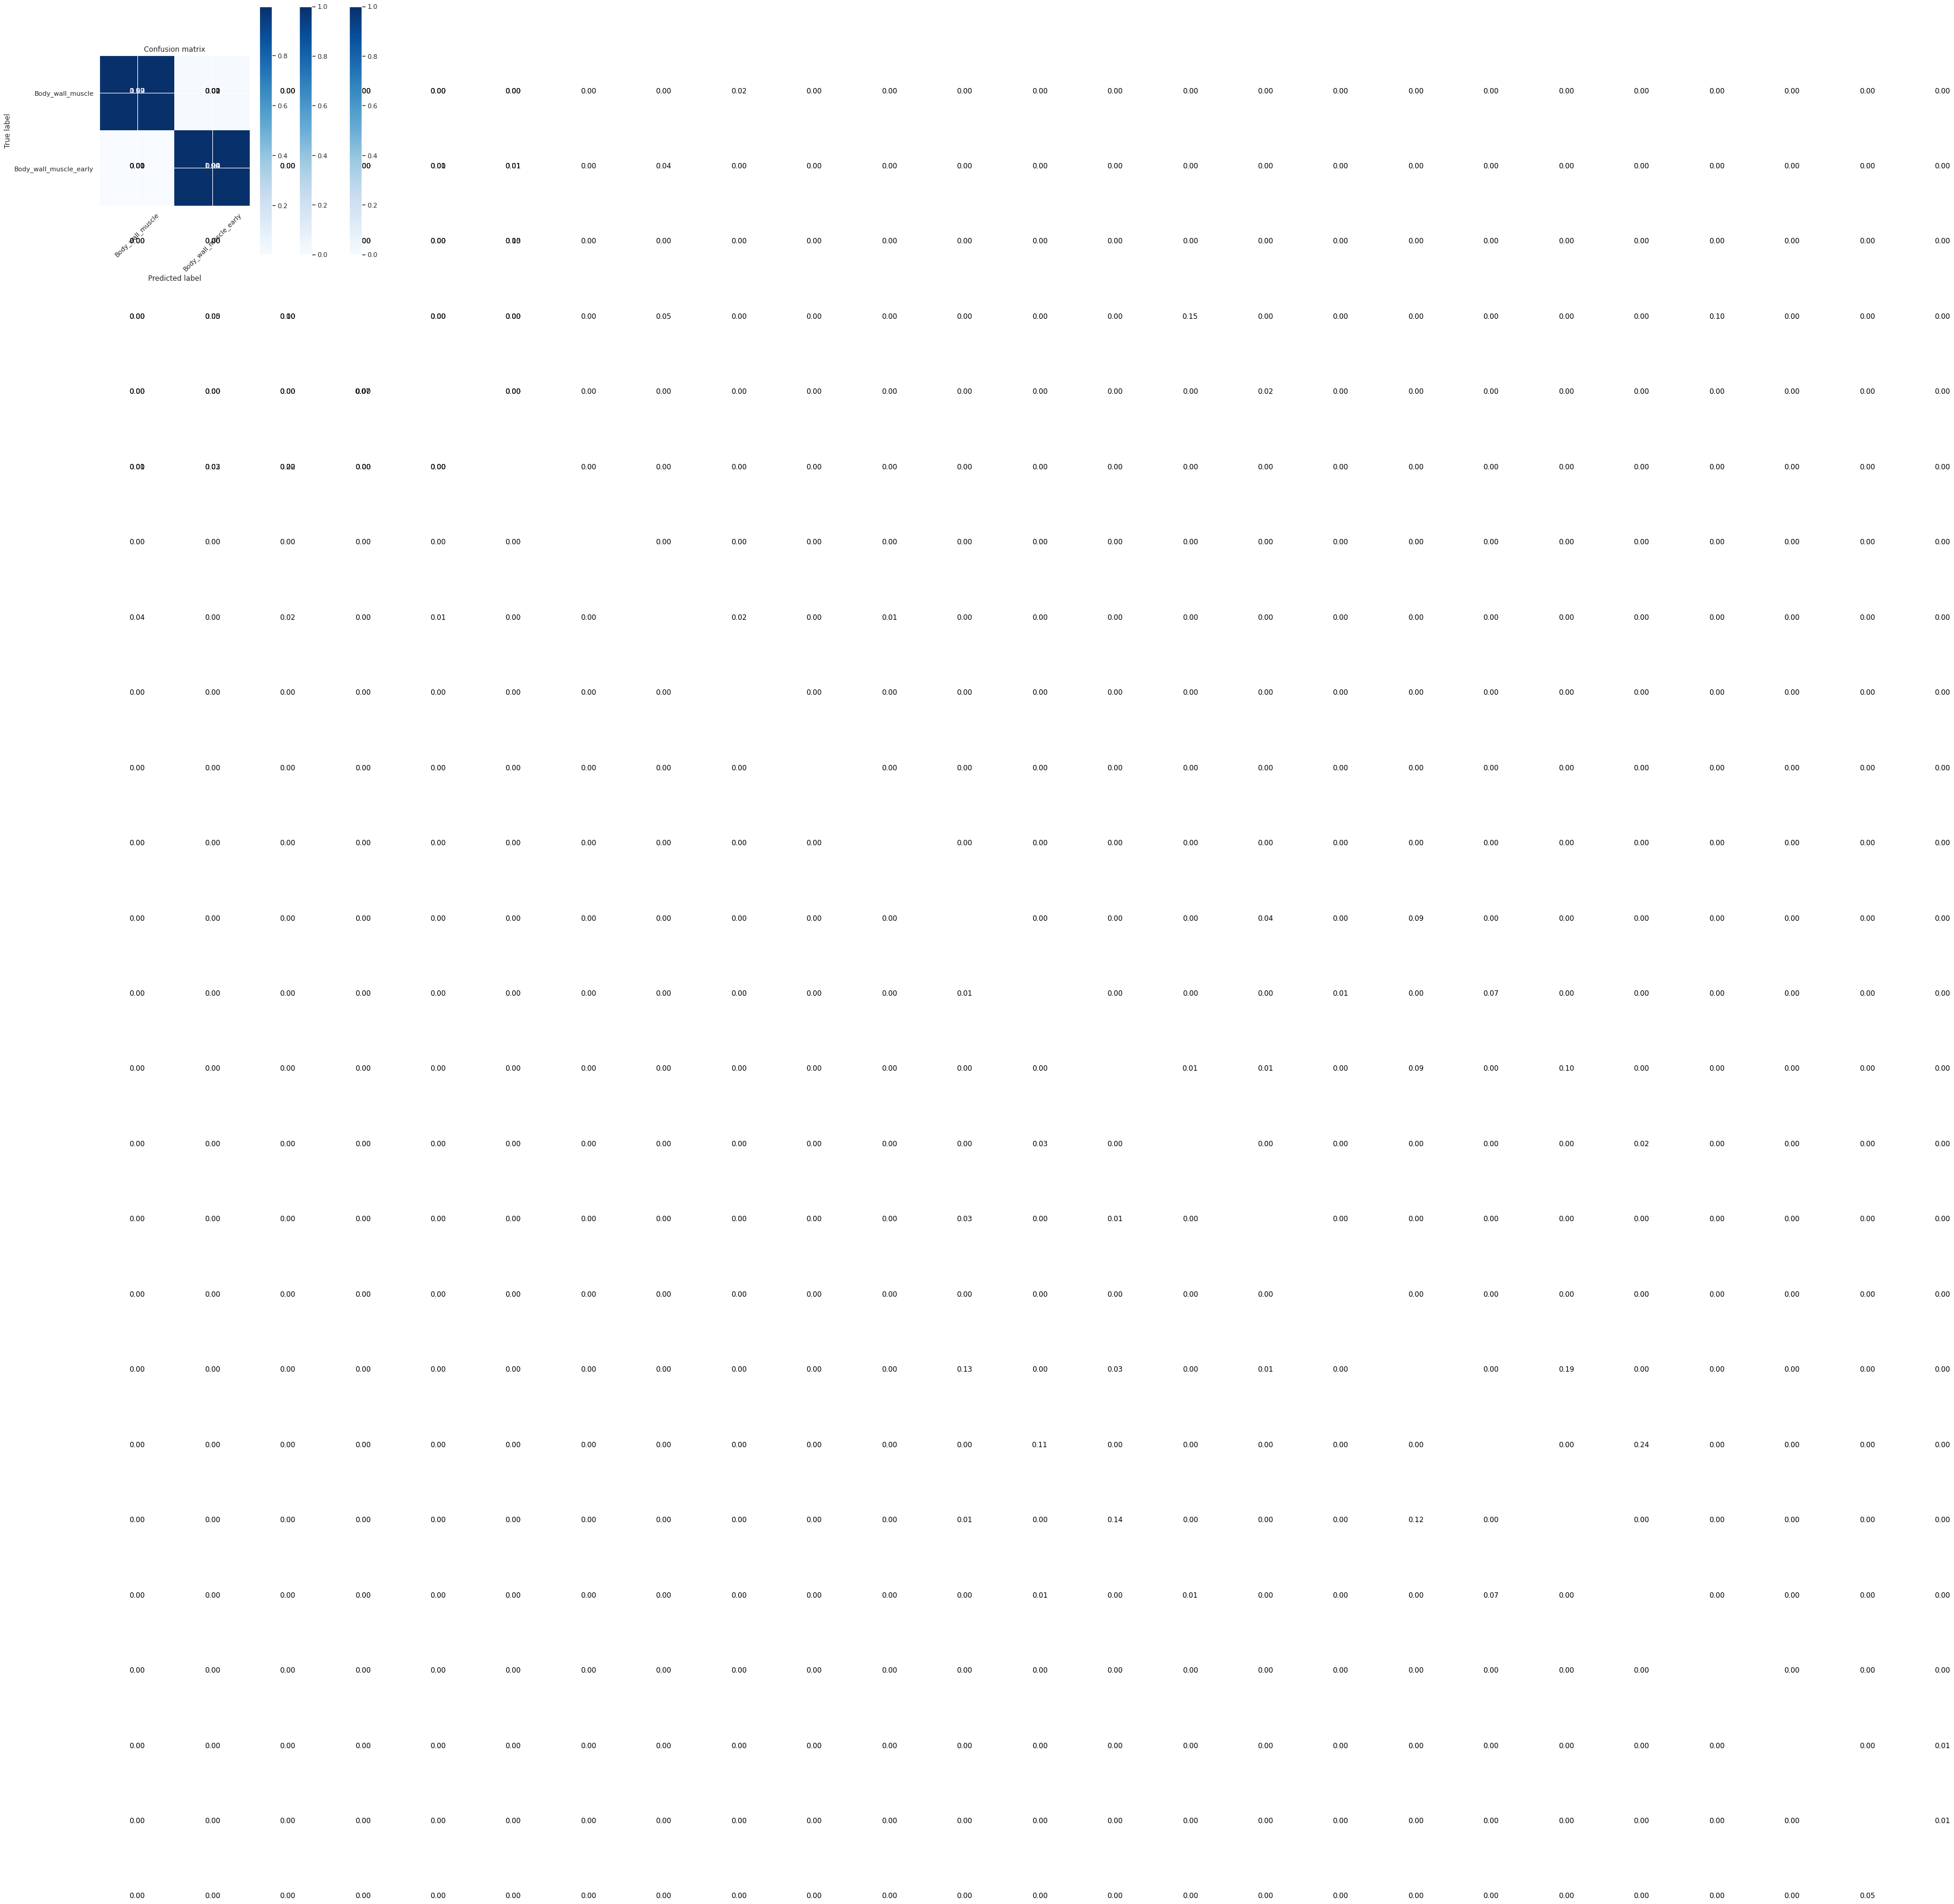

In [18]:
    confusion_counts_large = confusion_matrix(X, y[:, 0], 0.1)
    plot_confusion_matrix(confusion_counts_large,
                          np.unique(y[:, 0]),
                          'confusion_large.png',
                          normalize=True)

    confusion_counts_small = confusion_matrix(X, y[:, 1], 0.1)
    plot_confusion_matrix(confusion_counts_small,
                          np.unique(y[:, 1]),
                          'confusion_small.png',
                          normalize=True)

    confusion_counts_bwm = confusion_matrix(X_bwm, y_bwm[:, 0], 0.1)
    plot_confusion_matrix(confusion_counts_bwm,
                          np.unique(y_bwm[:, 0]),
                          'confusion_bwm.png',
                          normalize=True)

In [0]:
def stratified_cv(X, y, c, seed=1):
    from sklearn.model_selection import StratifiedKFold
    from sklearn.linear_model import LogisticRegression

    skf = StratifiedKFold(n_splits=3, random_state=seed)
    accs = []
    coef_zeros = []
    for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        print('Running fold: {}'.format(fold))
        lr = LogisticRegression(C=c, penalty='l1',solver='saga')
        lr.fit(X[train_index], y[train_index])
        acc = lr.score(X[test_index], y[test_index])
        print('Accuracy for fold {}: {}'.format(fold, acc))
        accs.append(acc)
        zeros = np.count_nonzero(lr.coef_ == 0, axis=1)
        print('Zero coefficients for fold {}: {}'.format(fold, zeros))
        coef_zeros += list(zeros)
    return accs, coef_zeros

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Running fold: 1
Accuracy for fold 1: 0.19760479041916168
Zero coefficients for fold 1: [6684 6684 6684 6684 6684]
Running fold: 2
Accuracy for fold 2: 0.19760479041916168
Zero coefficients for fold 2: [6684 6684 6684 6684 6684]
Running fold: 3
Accuracy for fold 3: 0.19879518072289157
Zero coefficients for fold 3: [6684 6684 6684 6684 6684]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 1: 0.19760479041916168
Zero coefficients for fold 1: [6684 6684 6684 6684 6684]
Running fold: 2
Accuracy for fold 2: 0.19760479041916168
Zero coefficients for fold 2: [6684 6684 6684 6684 6684]
Running fold: 3
Accuracy for fold 3: 0.19879518072289157
Zero coefficients for fold 3: [6684 6684 6684 6684 6684]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 1: 0.49101796407185627
Zero coefficients for fold 1: [6684 6683 6683 6684 6684]
Running fold: 2
Accuracy for fold 2: 0.5269461077844312
Zero coefficients for fold 2: [6684 6683 6683 6684 6684]
Running fold: 3
Accuracy for fold 3: 0.5240963855421686
Zero coefficients for fold 3: [6684 6683 6683 6684 6684]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 1: 0.49101796407185627
Zero coefficients for fold 1: [6684 6683 6683 6684 6684]
Running fold: 2
Accuracy for fold 2: 0.5269461077844312
Zero coefficients for fold 2: [6684 6683 6683 6684 6684]
Running fold: 3
Accuracy for fold 3: 0.5240963855421686
Zero coefficients for fold 3: [6684 6683 6683 6684 6684]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 1: 0.8083832335329342
Zero coefficients for fold 1: [6682 6683 6681 6682 6681]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.8263473053892215
Zero coefficients for fold 2: [6682 6683 6680 6683 6681]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.7831325301204819
Zero coefficients for fold 3: [6682 6683 6680 6683 6681]
Running fold: 1
Accuracy for fold 1: 0.8083832335329342
Zero coefficients for fold 1: [6682 6683 6681 6682 6681]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.8263473053892215
Zero coefficients for fold 2: [6682 6683 6680 6683 6681]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.7831325301204819
Zero coefficients for fold 3: [6682 6683 6680 6683 6681]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.874251497005988
Zero coefficients for fold 1: [6680 6683 6678 6681 6679]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.8622754491017964
Zero coefficients for fold 2: [6681 6683 6679 6680 6680]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.8795180722891566
Zero coefficients for fold 3: [6682 6683 6678 6680 6679]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.874251497005988
Zero coefficients for fold 1: [6680 6683 6678 6681 6679]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.8622754491017964
Zero coefficients for fold 2: [6681 6683 6679 6680 6680]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.8795180722891566
Zero coefficients for fold 3: [6682 6683 6678 6680 6679]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9041916167664671
Zero coefficients for fold 1: [6677 6683 6678 6676 6676]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9161676646706587
Zero coefficients for fold 2: [6676 6681 6678 6675 6677]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.9036144578313253
Zero coefficients for fold 3: [6677 6681 6678 6674 6677]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9041916167664671
Zero coefficients for fold 1: [6677 6683 6678 6676 6676]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9161676646706587
Zero coefficients for fold 2: [6676 6681 6678 6675 6677]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.9036144578313253
Zero coefficients for fold 3: [6677 6680 6678 6674 6677]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9161676646706587
Zero coefficients for fold 1: [6671 6679 6676 6666 6673]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9161676646706587
Zero coefficients for fold 2: [6672 6677 6677 6667 6676]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.9216867469879518
Zero coefficients for fold 3: [6669 6677 6677 6668 6672]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9221556886227545
Zero coefficients for fold 1: [6670 6679 6675 6666 6673]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9161676646706587
Zero coefficients for fold 2: [6672 6677 6677 6667 6676]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.9216867469879518
Zero coefficients for fold 3: [6668 6677 6677 6670 6672]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9221556886227545
Zero coefficients for fold 1: [6659 6675 6676 6658 6666]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9041916167664671
Zero coefficients for fold 2: [6660 6672 6677 6655 6665]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.9397590361445783
Zero coefficients for fold 3: [6658 6673 6676 6658 6664]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9221556886227545
Zero coefficients for fold 1: [6659 6675 6676 6658 6667]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9041916167664671
Zero coefficients for fold 2: [6662 6671 6677 6656 6665]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.9397590361445783
Zero coefficients for fold 3: [6658 6673 6676 6659 6664]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9341317365269461
Zero coefficients for fold 1: [6647 6666 6673 6643 6657]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9221556886227545
Zero coefficients for fold 2: [6649 6660 6676 6636 6649]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.9518072289156626
Zero coefficients for fold 3: [6647 6667 6673 6647 6652]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9341317365269461
Zero coefficients for fold 1: [6647 6666 6673 6642 6655]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9221556886227545
Zero coefficients for fold 2: [6649 6661 6676 6637 6649]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.9518072289156626
Zero coefficients for fold 3: [6645 6667 6673 6644 6651]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9401197604790419
Zero coefficients for fold 1: [6644 6663 6671 6637 6645]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9341317365269461
Zero coefficients for fold 2: [6640 6655 6675 6630 6637]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.9457831325301205
Zero coefficients for fold 3: [6638 6658 6669 6638 6640]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9401197604790419
Zero coefficients for fold 1: [6643 6664 6671 6638 6643]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9281437125748503
Zero coefficients for fold 2: [6640 6655 6675 6630 6638]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 3: 0.9457831325301205
Zero coefficients for fold 3: [6637 6658 6669 6638 6639]


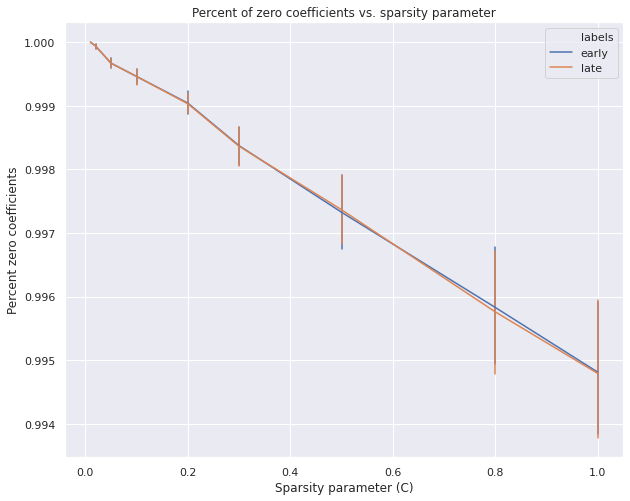

In [41]:
    # Body_wall_muscle_early vs. Body_wall_muscle_late:
    X, y = log_counts.values, labels_df.values
    total_genes = X.shape[1]
    bwm_early_ix = labels_df['label1'].isin(['Body_wall_muscle_early'])
    bwm_late_ix = labels_df['label1'].isin(['Body_wall_muscle'])
    X_early, y_early = log_counts[bwm_early_ix].values, labels_df[bwm_late_ix].values
    X_late, y_late = log_counts[bwm_early_ix].values, labels_df[bwm_late_ix].values
    C = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 0.8, 1]
    results = pd.DataFrame()
    zeros = pd.DataFrame()
    for c in C:
        c_acc_early, coef_early = stratified_cv(X_early, y_early[:, 1], c)
        c_acc_late, coef_late = stratified_cv(X_late, y_late[:, 1], c)
        c_data, z_data = [], []

        for eacc in c_acc_early:
            c_data.append([c, eacc, 'early'])
        for lacc in c_acc_late:
            c_data.append([c, lacc, 'late'])
        c_df = pd.DataFrame(c_data, columns=['c', 'acc', 'labels'])
        results = pd.concat((results, c_df))

        for z_early in coef_early:
            z_data.append([c, z_early / total_genes, 'early'])
        for z_late in coef_late:
            z_data.append([c, z_late / total_genes, 'late'])
        c_zeros = pd.DataFrame(z_data, columns=['c', 'num_zeros', 'labels'])
        zeros = pd.concat((zeros, c_zeros))

    # plot accuracy vs. sparsity parameter for early/late BWM data
    sns.set()
    sns.lineplot(x='c', y='acc', hue='labels', data=results, err_style='bars')
    plt.title('Accuracy vs. sparsity parameter')
    plt.xlabel('Sparsity parameter (C)')
    plt.ylabel('Accuracy')
    plt.savefig('acc_vs_c_early_late.png')
    plt.gcf().clear()
    sns.lineplot(x='c', y='num_zeros', hue='labels', data=zeros, err_style='bars')
    plt.title('Percent of zero coefficients vs. sparsity parameter')
    plt.xlabel('Sparsity parameter (C)')
    plt.ylabel('Percent zero coefficients')
    plt.savefig('zeros_vs_c_early_late.png')


In [0]:
#  tissue_pairs:
tissue_pairs = {
        'anterior': ('BWM_anterior', 'BWM_anterior_early'),
        'far_posterior': ('BWM_far_posterior', 'BWM_far_posterior_early'),
        'head': ('BWM_head', 'BWM_head_early'),
        'middle': ('BWM_middle', 'BWM_middle_early'),
        'posterior': ('BWM_posterior', 'BWM_posterior_early')
}
import itertools

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9402985074626866
Zero coefficients for fold 1: [6681]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9699248120300752
Zero coefficients for fold 2: [6678]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.9924812030075187
Zero coefficients for fold 3: [6679]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9701492537313433
Zero coefficients for fold 1: [6679]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.924812030075188
Zero coefficients for fold 2: [6680]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.8646616541353384
Zero coefficients for fold 3: [6682]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.8507462686567164
Zero coefficients for fold 1: [6675]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9097744360902256
Zero coefficients for fold 2: [6675]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.7593984962406015
Zero coefficients for fold 3: [6675]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.8955223880597015
Zero coefficients for fold 1: [6675]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9097744360902256
Zero coefficients for fold 2: [6677]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.9022556390977443
Zero coefficients for fold 3: [6678]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9925373134328358
Zero coefficients for fold 1: [6678]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9849624060150376
Zero coefficients for fold 2: [6678]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.9699248120300752
Zero coefficients for fold 3: [6679]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.8805970149253731
Zero coefficients for fold 1: [6678]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9398496240601504
Zero coefficients for fold 2: [6675]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.9924812030075187
Zero coefficients for fold 3: [6673]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.7910447761194029
Zero coefficients for fold 1: [6679]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.8872180451127819
Zero coefficients for fold 2: [6680]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.924812030075188
Zero coefficients for fold 3: [6678]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9850746268656716
Zero coefficients for fold 1: [6680]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9774436090225563
Zero coefficients for fold 2: [6679]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.9548872180451128
Zero coefficients for fold 3: [6678]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9850746268656716
Zero coefficients for fold 1: [6678]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9924812030075187
Zero coefficients for fold 2: [6677]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.9624060150375939
Zero coefficients for fold 3: [6679]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.7611940298507462
Zero coefficients for fold 1: [6678]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.7969924812030075
Zero coefficients for fold 2: [6678]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 3: 0.8270676691729323
Zero coefficients for fold 3: [6675]


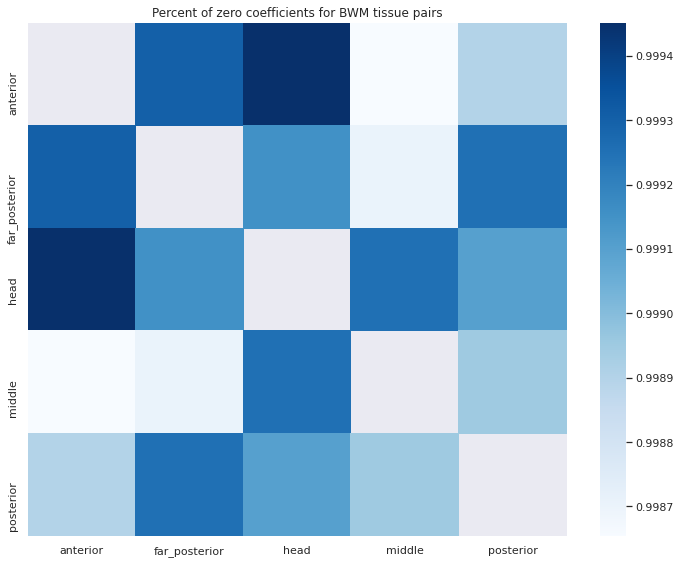

In [45]:
    X, y = log_counts.values, labels_df.values
    total_genes = X.shape[1]
    results = pd.DataFrame()
    zeros = pd.DataFrame()

    tissues = tissue_pairs.keys()
    for t1, t2 in itertools.combinations(tissues, 2):
        names = tissue_pairs[t1] + tissue_pairs[t2]
        t_ix = labels_df['label2'].isin(names)
        X_t = log_counts[t_ix].values
        y_t = labels_df[t_ix].values
        y_t_binary = np.zeros((y_t.shape[0],))
        for i, y in enumerate(y_t):
            if t1 in y[1]:
                y_t_binary[i] = 1
            elif t2 in y[1]:
                y_t_binary[i] = -1

        c = 0.1
        c_acc_t, coef_t = stratified_cv(X_t, y_t_binary, c)
        c_data, z_data = [], []

        for tacc in c_acc_t:
            c_data.append([c, tacc, t1, t2])
            c_data.append([c, tacc, t2, t1])
        c_df = pd.DataFrame(c_data, columns=['c', 'acc', 'tissue_1', 'tissue_2'])
        results = pd.concat((results, c_df))

        for z_t in coef_t:
            z_data.append([c, z_t / total_genes, t1, t2])
            z_data.append([c, z_t / total_genes, t2, t1])
        c_zeros = pd.DataFrame(z_data, columns=['c', 'num_zeros', 'tissue_1', 'tissue_2'])
        zeros = pd.concat((zeros, c_zeros))

    # plot accuracy vs. sparsity parameter for early/late BWM data
    sns.set()
    results_wide = results.pivot_table(index='tissue_1', columns='tissue_2', values='acc')
    sns.heatmap(results_wide, cmap='Blues')
    plt.title('Accuracy for BWM tissue pair classifiers')
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()
    plt.savefig('tissue_pairs_acc_heatmap.png')
    plt.gcf().clear()
    zeros_wide = zeros.pivot_table(index='tissue_1', columns='tissue_2', values='num_zeros')
    sns.heatmap(zeros_wide, cmap='Blues')
    plt.title('Percent of zero coefficients for BWM tissue pairs')
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()
    plt.savefig('tissue_pairs_zeros_heatmap.png')


In [0]:
tissue_pairs = [
    ('BWM_anterior', 'BWM_anterior_early'),
    ('BWM_far_posterior', 'BWM_far_posterior_early'),
    ('BWM_head', 'BWM_head_early'),
    ('BWM_middle', 'BWM_middle_early'),
    ('BWM_posterior', 'BWM_posterior_early')
]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Running fold: 1
Accuracy for fold 1: 0.5074626865671642
Zero coefficients for fold 1: [6684]
Running fold: 2
Accuracy for fold 2: 0.5074626865671642
Zero coefficients for fold 2: [6684]
Running fold: 3
Accuracy for fold 3: 0.5
Zero coefficients for fold 3: [6684]
Running fold: 1
Accuracy for fold 1: 0.4925373134328358
Zero coefficients for fold 1: [6684]
Running fold: 2
Accuracy for fold 2: 0.4925373134328358
Zero coefficients for fold 2: [6684]
Running fold: 3
Accuracy for fold 3: 0.5
Zero coefficients for fold 3: [6684]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 1.0
Zero coefficients for fold 1: [6681]
Running fold: 2
Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6682]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6681]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 1.0
Zero coefficients for fold 1: [6679]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6680]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6679]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 1.0
Zero coefficients for fold 1: [6675]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6677]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6675]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 1.0
Zero coefficients for fold 1: [6672]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6675]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6672]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 1.0
Zero coefficients for fold 1: [6666]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6671]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6666]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 1.0
Zero coefficients for fold 1: [6654]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6662]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6655]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 1.0
Zero coefficients for fold 1: [6650]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6658]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6650]
Running fold: 1
Accuracy for fold 1: 0.4925373134328358
Zero coefficients for fold 1: [6684]
Running fold: 2
Accuracy for fold 2: 0.5074626865671642
Zero coefficients for fold 2: [6684]
Running fold: 3
Accuracy for fold 3: 0.5
Zero coefficients for fold 3: [6684]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 1: 0.9701492537313433
Zero coefficients for fold 1: [6683]
Running fold: 2
Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6683]
Running fold: 3
Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6683]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9701492537313433
Zero coefficients for fold 1: [6683]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6683]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6683]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9850746268656716
Zero coefficients for fold 1: [6681]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6681]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6681]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9850746268656716
Zero coefficients for fold 1: [6679]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6679]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6679]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9850746268656716
Zero coefficients for fold 1: [6678]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6676]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6679]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9850746268656716
Zero coefficients for fold 1: [6673]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6672]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6674]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9850746268656716
Zero coefficients for fold 1: [6665]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6665]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6670]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9850746268656716
Zero coefficients for fold 1: [6662]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6661]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6668]
Running fold: 1
Accuracy for fold 1: 0.4925373134328358
Zero coefficients for fold 1: [6684]
Running fold: 2
Accuracy for fold 2: 0.4925373134328358
Zero coefficients for fold 2: [6684]
Running fold: 3
Accuracy for fold 3: 0.5
Zero coefficients for fold 3: [6684]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Running fold: 1
Accuracy for fold 1: 0.4925373134328358
Zero coefficients for fold 1: [6684]
Running fold: 2
Accuracy for fold 2: 0.5074626865671642
Zero coefficients for fold 2: [6684]
Running fold: 3
Accuracy for fold 3: 0.5
Zero coefficients for fold 3: [6684]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9850746268656716
Zero coefficients for fold 1: [6681]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6680]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6681]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 1.0
Zero coefficients for fold 1: [6677]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6677]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6678]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9850746268656716
Zero coefficients for fold 1: [6674]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6674]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6674]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9850746268656716
Zero coefficients for fold 1: [6667]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6670]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6669]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9850746268656716
Zero coefficients for fold 1: [6662]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6660]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6664]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9850746268656716
Zero coefficients for fold 1: [6653]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6649]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6653]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 0.9850746268656716
Zero coefficients for fold 1: [6648]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6643]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6648]
Running fold: 1
Accuracy for fold 1: 0.4925373134328358
Zero coefficients for fold 1: [6684]
Running fold: 2
Accuracy for fold 2: 0.4925373134328358
Zero coefficients for fold 2: [6684]
Running fold: 3
Accuracy for fold 3: 0.5
Zero coefficients for fold 3: [6684]
Running fold: 1
Accuracy for fold 1: 0.8805970149253731
Zero coefficients for fold 1: [6683]
Running fold: 2
Accuracy for fold 2: 0.9104477611940298
Zero coefficients for fold 2: [6683]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.8787878787878788
Zero coefficients for fold 3: [6683]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 1.0
Zero coefficients for fold 1: [6680]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9850746268656716
Zero coefficients for fold 2: [6680]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6681]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 1.0
Zero coefficients for fold 1: [6679]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6679]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6679]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 1.0
Zero coefficients for fold 1: [6678]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6678]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6677]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 1.0
Zero coefficients for fold 1: [6673]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6668]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6673]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 1.0
Zero coefficients for fold 1: [6665]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6660]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6661]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 1.0
Zero coefficients for fold 1: [6650]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6648]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6649]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 1.0
Zero coefficients for fold 1: [6648]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6641]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6642]
Running fold: 1
Accuracy for fold 1: 0.4925373134328358
Zero coefficients for fold 1: [6684]
Running fold: 2
Accuracy for fold 2: 0.5074626865671642
Zero coefficients for fold 2: [6684]
Running fold: 3
Accuracy for fold 3: 0.5
Zero coefficients for fold 3: [6684]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 1: 1.0
Zero coefficients for fold 1: [6683]
Running fold: 2
Accuracy for fold 2: 0.9850746268656716
Zero coefficients for fold 2: [6683]
Running fold: 3
Accuracy for fold 3: 0.9848484848484849
Zero coefficients for fold 3: [6683]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 1.0
Zero coefficients for fold 1: [6683]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 0.9850746268656716
Zero coefficients for fold 2: [6683]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.9848484848484849
Zero coefficients for fold 3: [6683]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 1.0
Zero coefficients for fold 1: [6680]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6680]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.9848484848484849
Zero coefficients for fold 3: [6680]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 1.0
Zero coefficients for fold 1: [6678]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6678]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 0.9848484848484849
Zero coefficients for fold 3: [6678]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 1.0
Zero coefficients for fold 1: [6678]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6678]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6678]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 1.0
Zero coefficients for fold 1: [6676]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6676]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6674]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 1.0
Zero coefficients for fold 1: [6672]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6671]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6672]
Running fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 1: 1.0
Zero coefficients for fold 1: [6670]
Running fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 2: 1.0
Zero coefficients for fold 2: [6666]
Running fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for fold 3: 1.0
Zero coefficients for fold 3: [6670]


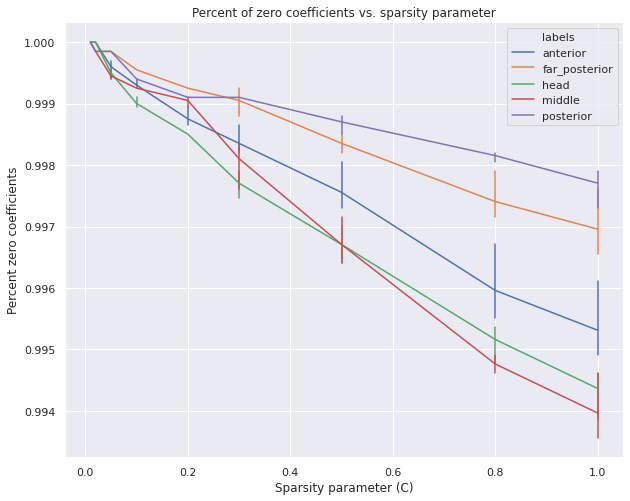

In [49]:
    for t1, t2 in tissue_pairs:
        tissue_name = '_'.join(t1.split('_')[1:])
        t_ix = labels_df['label2'].isin((t1, t2))
        X_t, y_t = log_counts[t_ix].values, labels_df[t_ix].values
        C = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 0.8, 1]
        for c in C:
            c_acc_t, coef_t = stratified_cv(X_t, y_t[:, 1], c)
            c_data, z_data = [], []

            for tacc in c_acc_t:
                c_data.append([c, tacc, tissue_name])
            c_df = pd.DataFrame(c_data, columns=['c', 'acc', 'labels'])
            results = pd.concat((results, c_df))

            for z_t in coef_t:
                z_data.append([c, z_t / total_genes, tissue_name])
            c_zeros = pd.DataFrame(z_data, columns=['c', 'num_zeros', 'labels'])
            zeros = pd.concat((zeros, c_zeros))

    # plot accuracy vs. sparsity parameter for early/late BWM data
    sns.set()
    sns.lineplot(x='c', y='acc', hue='labels', data=results, err_style='bars')
    plt.title('Accuracy vs. sparsity parameter')
    plt.xlabel('Sparsity parameter (C)')
    plt.ylabel('Accuracy')
    plt.savefig('acc_vs_c_tissue.png')
    plt.gcf().clear()
    sns.lineplot(x='c', y='num_zeros', hue='labels', data=zeros, err_style='bars')
    plt.title('Percent of zero coefficients vs. sparsity parameter')
    plt.xlabel('Sparsity parameter (C)')
    plt.ylabel('Percent zero coefficients')
    plt.savefig('zeros_vs_c_tissue.png')